# **Dados do Indice IBOVESPA B3**

## **O problema**

Você foi recentemente alocado em uma equipe de cientistas de dados de um grande fundo de investimentos brasileiro. Sua missão inicial é desenvolver um modelo preditivo capaz de prever se o índice IBOVESPA vai fechar em alta ou baixa no dia seguinte, com base em dados históricos do próprio índice. Esse modelo será usado como insumo para alimentar dashboards internos de tomada de decisão dos analistas quantitativos da empresa.

### **Dados**

Utilize os dados históricos do índice IBOVESPA, disponíveis publicamente: https://br.investing.com/indices/bovespa-historical-data
Requisitos:  
• Selecione o período “diário”.  
• Baixe um intervalo de pelo menos 2 anos de dados.  
• Realize o pré-processamento necessário para utilizar os dados no modelo.

### **Objetivo**

Criar um modelo que preveja se o fechamento do IBOVESPA do dia seguinte será maior ou menor que o do dia atual, ou seja:
Tech challenge Página 3 de 5.  
Seu modelo deve prever a tendência (↑ ou ↓) com acuracidade mínima de 75% em um conjunto de teste. O conjunto de testes deverá conter o último mês (30 dias) de dados disponíveis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import(
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix
)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

sns.set_style()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

In [2]:
#url = "https://raw.githubusercontent.com/JacksonvBarbosa/Analise_Indice_Ibovespa/refs/heads/sofia/data/Dados_Historicos_Ibovespa_2008-2025.csv."
# df_ibov = pd.read_csv(url, sep=",",thousands='.', decimal=',', parse_dates=['Data'], date_format='%d.%m.%Y', index_col='Data')
#df_ibov = pd.read_csv(url_2008_2025, parse_dates=['Data'], index_col='Data', dayfirst=True)

In [3]:
df_ibov = pd.read_csv("C:/Users/wbaldin/Downloads/Dados_Historicos_Ibovespa_2008-2025.csv", thousands='.', decimal=',', parse_dates=['Data'], date_format='%d.%m.%Y')
df_ibov.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-06-18,138717,138844,139161,138443,"8,32B","-0,09%"
1,2025-06-17,138840,139256,139497,138293,"8,38B","-0,30%"
2,2025-06-16,139256,137212,139988,137212,"7,62B","1,49%"
3,2025-06-13,137213,137800,137800,136586,"8,63B","-0,43%"
4,2025-06-12,137800,137127,137931,136175,"7,12B","0,49%"


In [4]:
df_ibov.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-06-18,138717,138844,139161,138443,"8,32B","-0,09%"
1,2025-06-17,138840,139256,139497,138293,"8,38B","-0,30%"
2,2025-06-16,139256,137212,139988,137212,"7,62B","1,49%"
3,2025-06-13,137213,137800,137800,136586,"8,63B","-0,43%"
4,2025-06-12,137800,137127,137931,136175,"7,12B","0,49%"


In [5]:
df_ibov.rename(columns={'Data': 'ds'}, inplace=True)

In [6]:
df_ibov.index_col='ds'

In [7]:
# convertendo a coluna 'ds' para o índice do DataFrame
df_ibov.set_index('ds', inplace=True)

In [47]:
df_ibov_copia = df_ibov.copy()
df_ibov_copia

,Último,Abertura,Máxima,Mínima,Vol.,Var%
ds,,,,,,
2025-06-18,138717,138844,139161,138443,"8,32B","-0,09%"
2025-06-17,138840,139256,139497,138293,"8,38B","-0,30%"
2025-06-16,139256,137212,139988,137212,"7,62B","1,49%"
2025-06-13,137213,137800,137800,136586,"8,63B","-0,43%"
2025-06-12,137800,137127,137931,136175,"7,12B","0,49%"
...,...,...,...,...,...,...
2008-01-24,57463,54242,57675,54242,"3,80M","5,95%"
2008-01-23,54235,56098,56098,53011,"3,72M","-3,32%"
2008-01-22,56097,53705,56541,53610,"3,65M","4,45%"


In [48]:
df_ibov_copia.rename(columns={'Último': 'y'}, inplace=True)

In [49]:
df_ibov_copia

,y,Abertura,Máxima,Mínima,Vol.,Var%
ds,,,,,,
2025-06-18,138717,138844,139161,138443,"8,32B","-0,09%"
2025-06-17,138840,139256,139497,138293,"8,38B","-0,30%"
2025-06-16,139256,137212,139988,137212,"7,62B","1,49%"
2025-06-13,137213,137800,137800,136586,"8,63B","-0,43%"
2025-06-12,137800,137127,137931,136175,"7,12B","0,49%"
...,...,...,...,...,...,...
2008-01-24,57463,54242,57675,54242,"3,80M","5,95%"
2008-01-23,54235,56098,56098,53011,"3,72M","-3,32%"
2008-01-22,56097,53705,56541,53610,"3,65M","4,45%"


In [11]:
#convertendo a coliuna ds para coluna
#df_ibov_copia.reset_index(inplace=True) para quando for usar o prophet


In [51]:
display(df_ibov_copia.info())
display(df_ibov_copia.shape)
display(df_ibov_copia.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4315 entries, 2025-06-18 to 2008-01-18
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   y         4315 non-null   int64 
 1   Abertura  4315 non-null   int64 
 2   Máxima    4315 non-null   int64 
 3   Mínima    4315 non-null   int64 
 4   Vol.      4314 non-null   object
 5   Var%      4315 non-null   object
dtypes: int64(4), object(2)
memory usage: 365.0+ KB


None

(4315, 6)

,y,Abertura,Máxima,Mínima
count,4315.000000,4315.000000,4315.000000,4315.000000
mean,79352.197683,79333.994206,80080.700116,78597.684125
std,28359.063927,28346.475663,28473.375462,28232.454664
min,29435.000000,29438.000000,31480.000000,29435.000000
25%,55813.500000,55811.000000,56409.500000,55244.000000
50%,67766.000000,67756.000000,68198.000000,67191.000000
75%,106349.000000,106317.000000,107413.500000,105307.500000
max,140110.000000,140109.000000,140382.000000,138966.000000


<Axes: xlabel='ds', ylabel='y'>

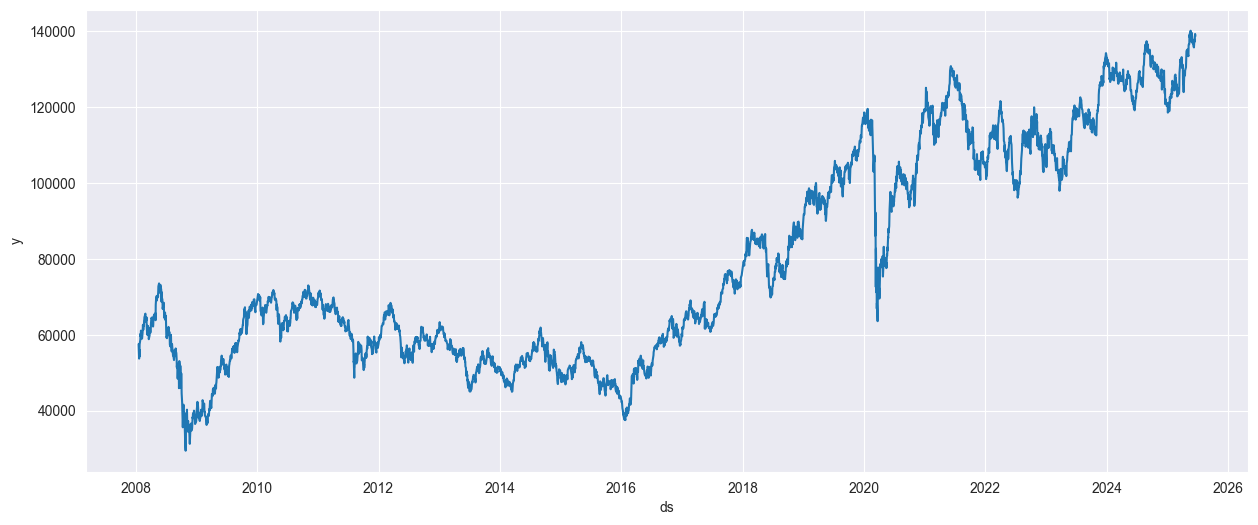

In [52]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=df_ibov_copia.index, y=df_ibov_copia['y'])

<Axes: title={'center': 'Índice Bovespa - Último Preço'}, xlabel='ds'>

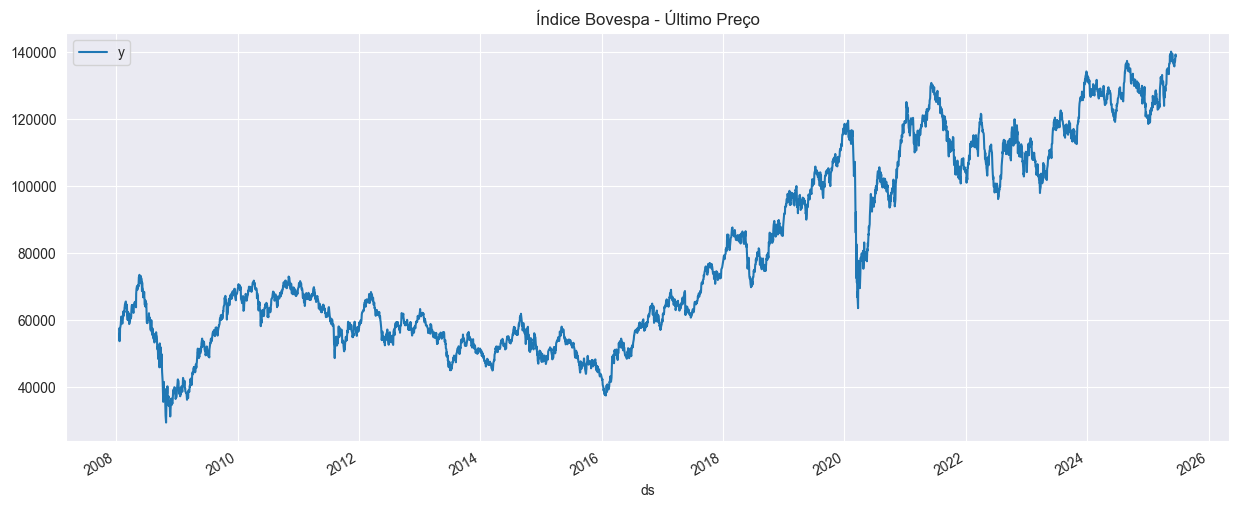

In [53]:
df_ibov_copia.plot(figsize=(15, 6), y='y', title='Índice Bovespa - Último Preço', grid=True)

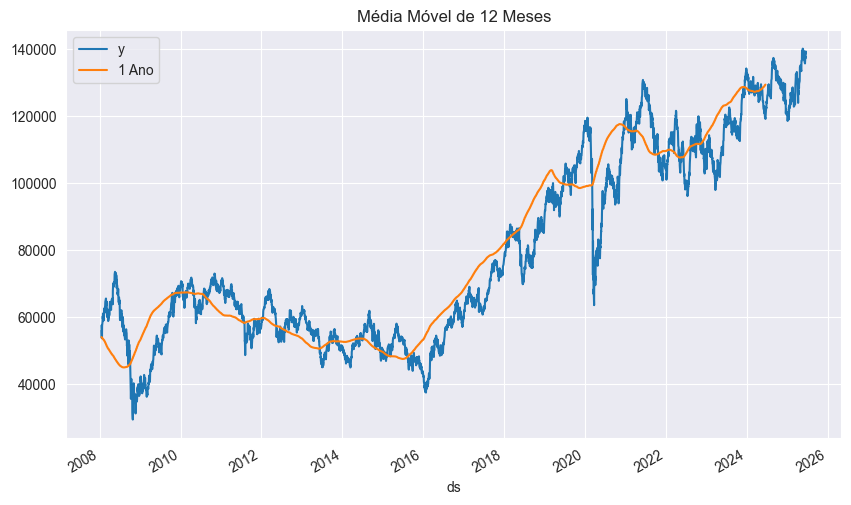

In [54]:
df_ibov_copia["1 Ano"] = df_ibov_copia["y"].rolling(window=252).mean()
df_ibov_copia[["y", "1 Ano"]].plot(title="Média Móvel de 12 Meses", figsize=(10, 6))
plt.show()

In [55]:
df_ibov_copia

,y,Abertura,Máxima,Mínima,Vol.,Var%,1 Ano
ds,,,,,,,
2025-06-18,138717,138844,139161,138443,"8,32B","-0,09%",NaN
2025-06-17,138840,139256,139497,138293,"8,38B","-0,30%",NaN
2025-06-16,139256,137212,139988,137212,"7,62B","1,49%",NaN
2025-06-13,137213,137800,137800,136586,"8,63B","-0,43%",NaN
2025-06-12,137800,137127,137931,136175,"7,12B","0,49%",NaN
...,...,...,...,...,...,...,...
2008-01-24,57463,54242,57675,54242,"3,80M","5,95%",53788.698413
2008-01-23,54235,56098,56098,53011,"3,72M","-3,32%",53844.285714
2008-01-22,56097,53705,56541,53610,"3,65M","4,45%",53913.325397


In [17]:
df_ibov_copia.loc['2008-01-21','y']

np.int64(53709)

In [18]:
resultados = seasonal_decompose(df_ibov_copia['y'], period=252)  # 252 dias úteis ~ 1 ano


<Axes: xlabel='ds'>

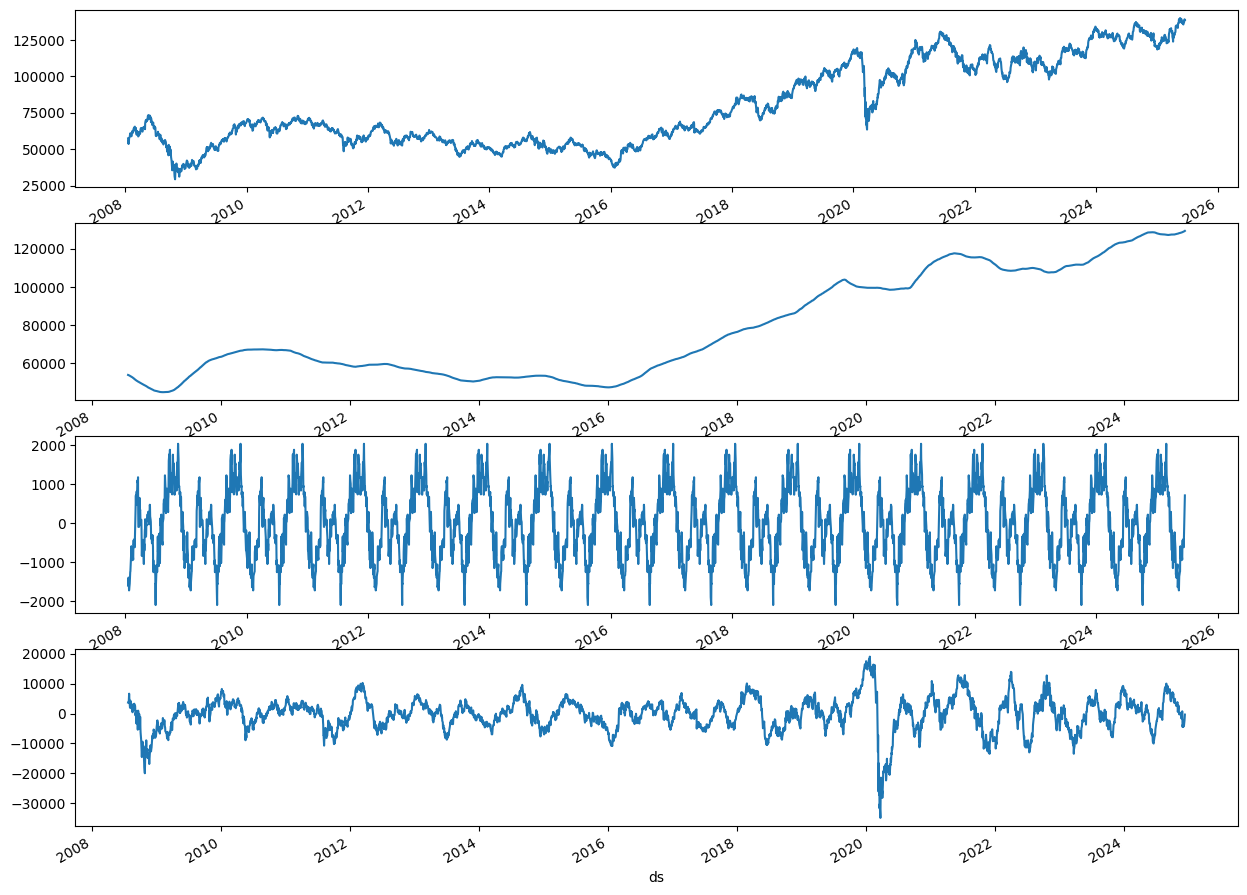

In [19]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,12))
resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
sns.set_style('darkgrid')

In [22]:
X = df_ibov_copia.y.values

In [23]:
df_ibov_copia.head()

,y,Abertura,Máxima,Mínima,Vol.,Var%,1 Ano
ds,,,,,,,
2025-06-18,138717,138844,139161,138443,"8,32B","-0,09%",NaN
2025-06-17,138840,139256,139497,138293,"8,38B","-0,30%",NaN
2025-06-16,139256,137212,139988,137212,"7,62B","1,49%",NaN
2025-06-13,137213,137800,137800,136586,"8,63B","-0,43%",NaN
2025-06-12,137800,137127,137931,136175,"7,12B","0,49%",NaN


In [24]:
X

array([138717, 138840, 139256, ...,  56097,  53709,  57506], shape=(4315,))

In [25]:
#teste ADF Augumented-Dickey-Fuller

result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -1.9999485285650003
P-Value: 0.28659566805509185
Valores críticos:
	1%: -3.4318695547063403
	5%: -2.8622114550484463
	10%: -2.5671274204239585


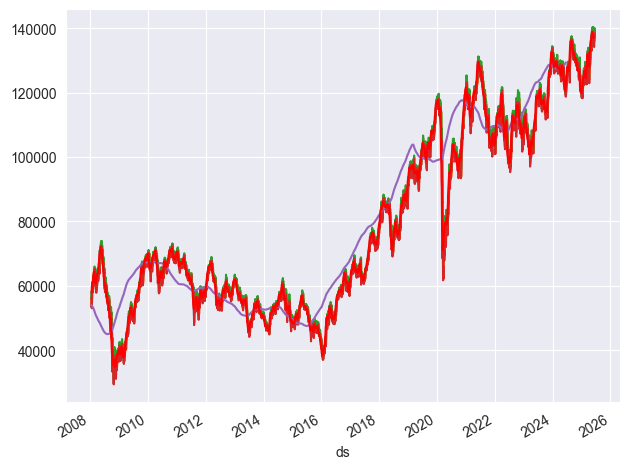

In [26]:
ma = df_ibov_copia['y'].rolling(12).mean()
f, ax = plt.subplots()

df_ibov_copia.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

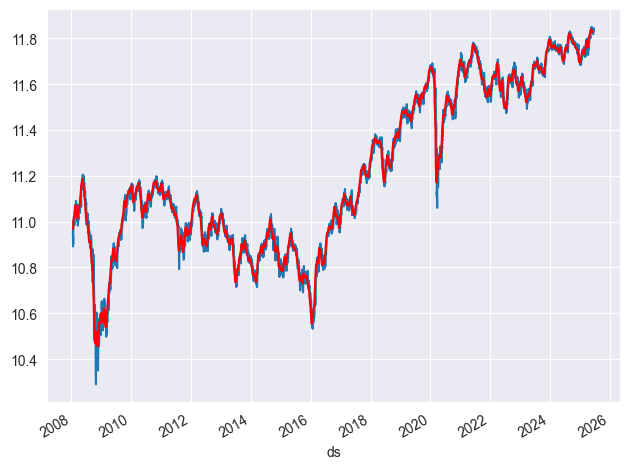

In [27]:
df_log = np.log(df_ibov_copia['y'])
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

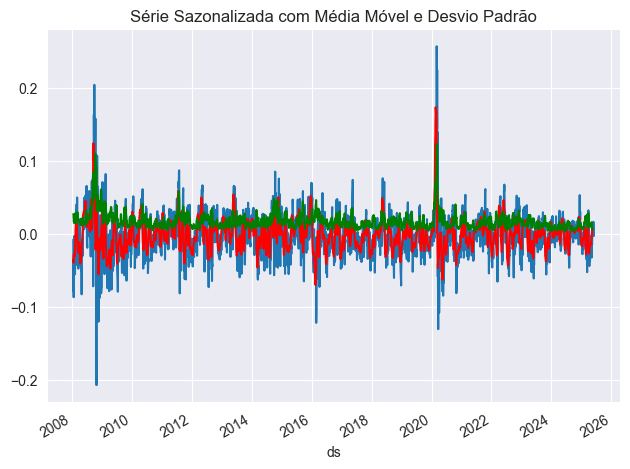

In [28]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.title('Série Sazonalizada com Média Móvel e Desvio Padrão')
plt.tight_layout()




In [29]:

# agora está estacionaria para usar o arima. 


X_s = df_s.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -12.097361820047503
P-Value: 2.0558234763701408e-22
Valores críticos:
	1%: -3.4318773628918766
	5%: -2.8622149044141842
	10%: -2.567129256698322


Teste ADF
Teste Estatístico: -18.262330920031904
P-Value: 2.3295881322291094e-30
Valores críticos:
	1%: -3.431881655819198
	5%: -2.862216800865834
	10%: -2.5671302662774935


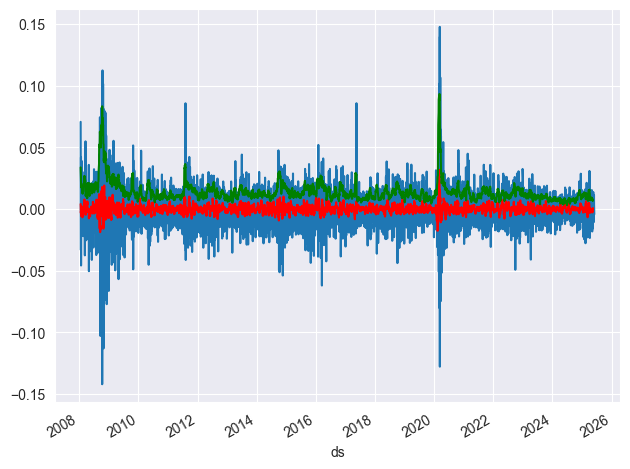

In [56]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = df_diff.values
X_diff = X_diff[~np.isnan(X_diff)] #dropando NA
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

In [57]:
df_diff_copia = df_diff.copy()
df_diff_copia

ds
2025-06-03         NaN
2025-06-02   -0.004366
2025-05-30    0.002848
2025-05-29    0.011371
2025-05-28    0.001541
                ...   
2008-01-24   -0.013402
2008-01-23   -0.045874
2008-01-22    0.041831
2008-01-21   -0.033383
2008-01-18    0.070553
Name: y, Length: 4304, dtype: float64

In [58]:
lag_acf = acf(df_diff.dropna(), nlags=60)
lag_pacf = pacf(df_diff.dropna(), nlags=60)

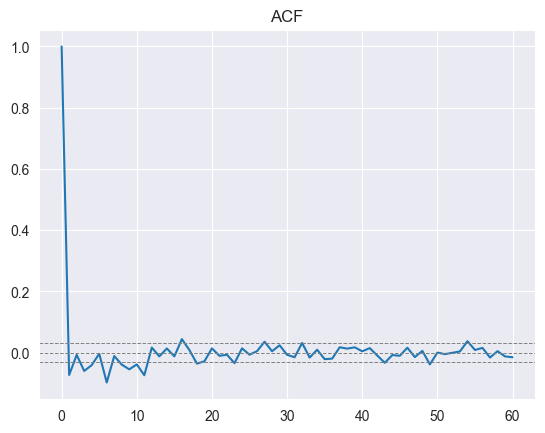

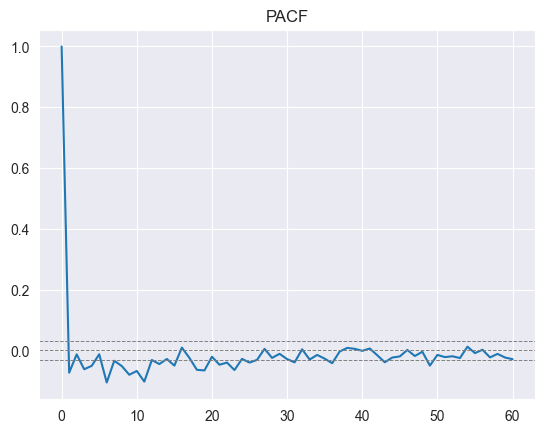

In [59]:
plt.plot(lag_acf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("PACF")
plt.show()

In [34]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

# Calcule ACF e PACF com intervalos de confiança
acf_vals, acf_confint = acf(df_diff.dropna(), nlags=60, alpha=0.05)
pacf_vals, pacf_confint = pacf(df_diff.dropna(), nlags=60, alpha=0.05)

# Para ACF: conta lags (exceto lag 0) fora do intervalo de confiança
acf_out = [i for i in range(1, len(acf_vals)) if (acf_vals[i] < acf_confint[i,0]) or (acf_vals[i] > acf_confint[i,1])]
print(f'Lags significativos em ACF (q): {acf_out} (total: {len(acf_out)})')

# Para PACF: conta lags (exceto lag 0) fora do intervalo de confiança
pacf_out = [i for i in range(1, len(pacf_vals)) if (pacf_vals[i] < pacf_confint[i,0]) or (pacf_vals[i] > pacf_confint[i,1])]
print(f'Lags significativos em PACF (p): {pacf_out} (total: {len(pacf_out)})')

Lags significativos em ACF (q): [] (total: 0)
Lags significativos em PACF (p): [] (total: 0)


Perguntar ao prof como definir o pdq do meu modelo, de acordo com os dados de ACF e PACF, se o dado que tenho que pegar é o primeiro que cruza a primeira linha ou seja ali em "1"

fiquei com dúvida

estava difícil identificar onde o lag corta a linha tracejada para definir o p e q pela ia fala que nenhim lag está significativamente fora dos limites de confiança.


o que a IA retornou
--

Claro! Vamos imaginar que você está tentando adivinhar o tempo de amanhã só olhando para os dias anteriores.

O ARIMA é como uma "máquina de adivinhar" que tenta prever o próximo número de uma sequência, olhando para o que aconteceu antes.
Agora, os valores p, d e q são como regras para essa máquina:

d: Quantas vezes você precisa olhar a diferença entre os dias para a sequência ficar "calminha" (sem tendência de subir ou descer sempre)?
No seu caso, você fez isso 1 vez. Por isso, d = 1.
p: Quantos dias anteriores são importantes para tentar adivinhar o próximo?
Se p = 2, a máquina olha para os 2 dias anteriores.
No seu caso, p = 0: isso quer dizer que olhar para os dias anteriores não ajuda a adivinhar o próximo.
q: Quantos erros passados (diferenças entre o que a máquina previu e o que aconteceu) são importantes para tentar adivinhar o próximo?
Se q = 1, a máquina olha para o erro do dia anterior.
No seu caso, q = 0: isso quer dizer que os erros passados não ajudam a adivinhar o próximo.
Por que você precisa entender isso?
Porque, se você escolher valores errados para p, d e q, sua máquina pode tentar adivinhar olhando para coisas que não ajudam — e aí ela erra mais!

No seu caso, a resposta do computador foi:

"Olhar para os dias anteriores ou para os erros não ajuda, só fazer a diferença já é suficiente!"

Por isso, seu ARIMA deve ser (0, 1, 0).
Assim, sua máquina fica simples e não tenta adivinhar usando coisas inúteis!



In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

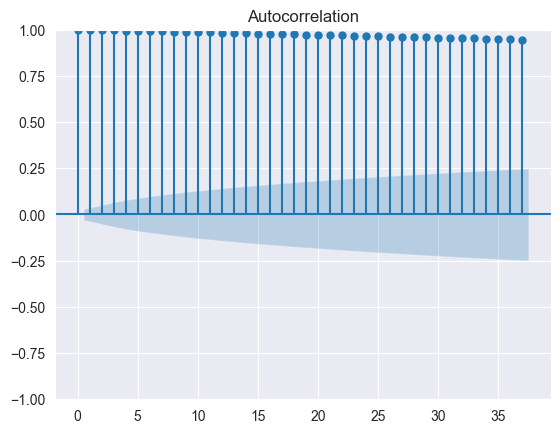

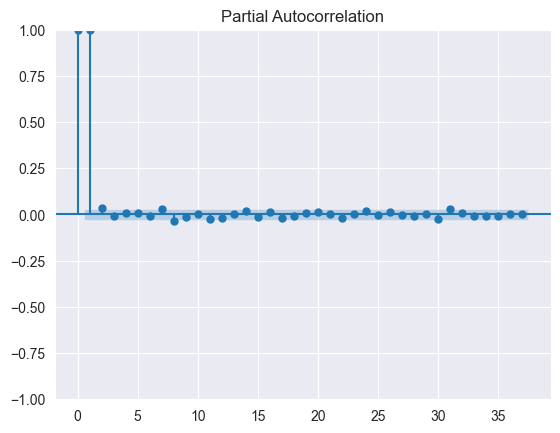

In [43]:
plot_acf(df_ibov_copia.y)
plot_pacf(df_ibov_copia.y)
plt.show()

C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  

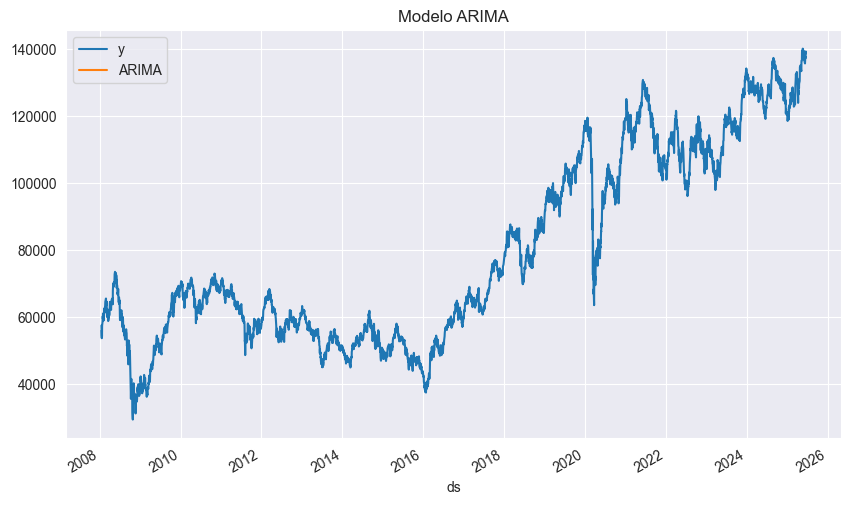

In [60]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustando o modelo ARIMA
model = ARIMA(df_ibov_copia["y"], order=(0, 1, 0))
model_fit = model.fit()
df_ibov_copia["ARIMA"] = model_fit.predict(start=1, end=len(df_ibov_copia), typ="levels")

# Plotando os resultados
df_ibov_copia[["y", "ARIMA"]].plot(title="Modelo ARIMA", figsize=(10, 6))
plt.show()

In [61]:
print (df_ibov_copia)

                 y  Abertura  Máxima  Mínima   Vol.    Var%         1 Ano  \
ds                                                                          
2025-06-18  138717    138844  139161  138443  8,32B  -0,09%           NaN   
2025-06-17  138840    139256  139497  138293  8,38B  -0,30%           NaN   
2025-06-16  139256    137212  139988  137212  7,62B   1,49%           NaN   
2025-06-13  137213    137800  137800  136586  8,63B  -0,43%           NaN   
2025-06-12  137800    137127  137931  136175  7,12B   0,49%           NaN   
...            ...       ...     ...     ...    ...     ...           ...   
2008-01-24   57463     54242   57675   54242  3,80M   5,95%  53788.698413   
2008-01-23   54235     56098   56098   53011  3,72M  -3,32%  53844.285714   
2008-01-22   56097     53705   56541   53610  3,65M   4,45%  53913.325397   
2008-01-21   53709     57503   57503   53487  3,57M  -6,60%  53973.642857   
2008-01-18   57506     57039   58291   56241  5,81M   0,82%  54050.523810   

C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  

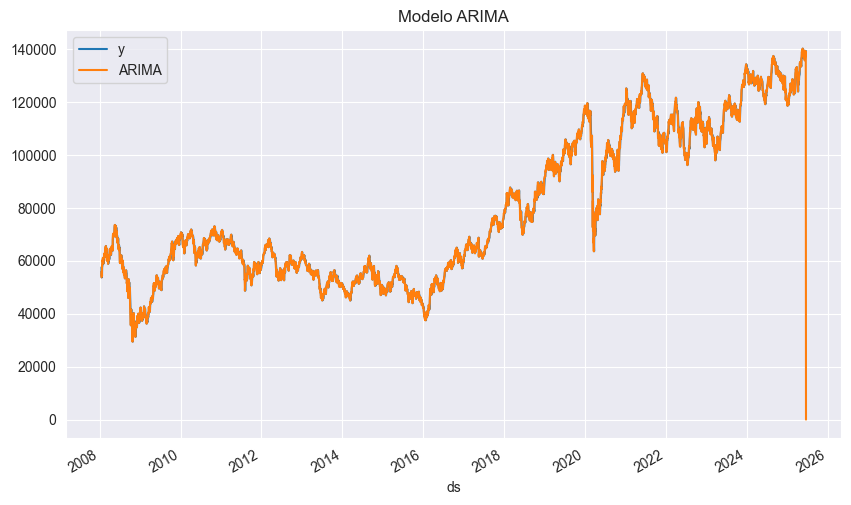

In [63]:
from statsmodels.tsa.arima.model import ARIMA
# Ajustando o modelo ARIMA
model = ARIMA(df_ibov_copia["y"], order=(0, 1, 0))
model_fit = model.fit() 
df_ibov_copia["ARIMA"] = model_fit.predict(start=df_ibov_copia.index[0], end=df_ibov_copia.index[-1], typ="levels")
# Plotando os resultados
df_ibov_copia[["y", "ARIMA"]].plot(title="Modelo ARIMA", figsize=(10, 6))
plt.show()

In [64]:
df_ibov_copia

,y,Abertura,Máxima,Mínima,Vol.,Var%,1 Ano,ARIMA
ds,,,,,,,,
2025-06-18,138717,138844,139161,138443,"8,32B","-0,09%",NaN,0.0
2025-06-17,138840,139256,139497,138293,"8,38B","-0,30%",NaN,138717.0
2025-06-16,139256,137212,139988,137212,"7,62B","1,49%",NaN,138840.0
2025-06-13,137213,137800,137800,136586,"8,63B","-0,43%",NaN,139256.0
2025-06-12,137800,137127,137931,136175,"7,12B","0,49%",NaN,137213.0
...,...,...,...,...,...,...,...,...
2008-01-24,57463,54242,57675,54242,"3,80M","5,95%",53788.698413,58594.0
2008-01-23,54235,56098,56098,53011,"3,72M","-3,32%",53844.285714,57463.0
2008-01-22,56097,53705,56541,53610,"3,65M","4,45%",53913.325397,54235.0


In [74]:
df_ibov_copia.sort_index(inplace=True)

In [76]:
from sklearn.metrics import mean_squared_error, r2_score


In [77]:
df_ibov_copia

,y,Abertura,Máxima,Mínima,Vol.,Var%,1 Ano,ARIMA
ds,,,,,,,,
2008-01-18,57506,57039,58291,56241,"5,81M","0,82%",54050.523810,53709.0
2008-01-21,53709,57503,57503,53487,"3,57M","-6,60%",53973.642857,56097.0
2008-01-22,56097,53705,56541,53610,"3,65M","4,45%",53913.325397,54235.0
2008-01-23,54235,56098,56098,53011,"3,72M","-3,32%",53844.285714,57463.0
2008-01-24,57463,54242,57675,54242,"3,80M","5,95%",53788.698413,58594.0
...,...,...,...,...,...,...,...,...
2025-06-12,137800,137127,137931,136175,"7,12B","0,49%",NaN,137213.0
2025-06-13,137213,137800,137800,136586,"8,63B","-0,43%",NaN,139256.0
2025-06-16,139256,137212,139988,137212,"7,62B","1,49%",NaN,138840.0


In [87]:
y = df_ibov_copia['y']
X = df_ibov_copia[['ARIMA','Máxima','Mínima','Abertura']]

In [88]:
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

In [89]:
#previsao e avaliacao

mse = mean_squared_error(y_test, forecast)
print(f'\nMSE: {mse:.2f}')
print(f'RMSE: {mse**0.5:.2f}')



MSE: 2266769.27
RMSE: 1505.58


In [90]:
# ...existing code...
mse = mean_squared_error(y_test, forecast)
rmse = mse**0.5

media_real = y_test.mean()

mse_pct = (mse / media_real) * 100
rmse_pct = (rmse / media_real) * 100

print(f'\nMSE: {mse:.2f} ({mse_pct:.2f}%)')
print(f'RMSE: {rmse:.2f} ({rmse_pct:.2f}%)')
# ...existing code...


MSE: 2266769.27 (1644.64%)
RMSE: 1505.58 (1.09%)


In [94]:
y_test

ds
2025-05-08    136232
2025-05-09    136512
2025-05-12    136563
2025-05-13    138963
2025-05-14    138423
2025-05-15    139334
2025-05-16    139187
2025-05-19    139636
2025-05-20    140110
2025-05-21    137881
2025-05-22    137273
2025-05-23    137824
2025-05-26    138136
2025-05-27    139541
2025-05-28    138888
2025-05-29    138534
2025-05-30    137027
2025-06-02    136787
2025-06-03    137546
2025-06-04    137002
2025-06-05    136236
2025-06-06    136102
2025-06-09    135699
2025-06-10    136436
2025-06-11    137128
2025-06-12    137800
2025-06-13    137213
2025-06-16    139256
2025-06-17    138840
2025-06-18    138717
Name: y, dtype: int64

In [92]:
from statsmodels.tsa.arima.model import ARIMA

# Ajuste o modelo ARIMA (use os parâmetros que você já definiu, ex: (0, 1, 0))
model = ARIMA(df_ibov_copia["y"], order=(0, 1, 0))
model_fit = model.fit()

# Prever os próximos 30 dias
forecast = model_fit.forecast(steps=30)

# Criar datas futuras para o índice
last_date = df_ibov_copia.index[-1]
future_dates = pd.date_range(last_date, periods=31, freq='B')[1:]  # 31 para incluir o último, [1:] para excluir o último conhecido

# Criar DataFrame com a previsão
df_forecast = pd.DataFrame({'Previsao_ARIMA': forecast}, index=future_dates)

print(df_forecast)

            Previsao_ARIMA
2025-06-19             NaN
2025-06-20             NaN
2025-06-23             NaN
2025-06-24             NaN
2025-06-25             NaN
2025-06-26             NaN
2025-06-27             NaN
2025-06-30             NaN
2025-07-01             NaN
2025-07-02             NaN
2025-07-03             NaN
2025-07-04             NaN
2025-07-07             NaN
2025-07-08             NaN
2025-07-09             NaN
2025-07-10             NaN
2025-07-11             NaN
2025-07-14             NaN
2025-07-15             NaN
2025-07-16             NaN
2025-07-17             NaN
2025-07-18             NaN
2025-07-21             NaN
2025-07-22             NaN
2025-07-23             NaN
2025-07-24             NaN
2025-07-25             NaN
2025-07-28             NaN
2025-07-29             NaN
2025-07-30             NaN


C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [93]:
#esinando o pq do log

import numpy as np

# 1. Série original
serie = df_ibov_copia['Último']

# 2. Aplica o logaritmo
serie_log = np.log(serie)

# 3. Diferencia a série logaritmizada
serie_log_diff = serie_log.diff().dropna()

# 4. Teste de estacionariedade
from statsmodels.tsa.stattools import adfuller
result = adfuller(serie_log_diff)
print(f"P-Value após log e diff: {result[1]:.3f}")

# 5. Visualização
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
ax1.plot(serie_log, color='green')
ax1.set_title('Série Logaritmizada')
ax1.grid(True)
ax2.plot(serie_log_diff, color='red')
ax2.set_title('Série Logaritmizada e Diferenciada')
ax2.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'Último'

In [ ]:
# ...existing code...

# 1. Pegue a série original
serie = df_ibov_copia['Último']

# 2. Aplique a diferença (primeira diferença)
serie_diff = serie.diff().dropna()

# 3. Teste novamente a estacionariedade
from statsmodels.tsa.stattools import adfuller
result = adfuller(serie_diff)
print(f"P-Value após diff: {result[1]:.10f}")



P-Value após diff: 0.0000000000


In [ ]:
import pandas as pd
import numpy as np

# Series pandas
s = pd.Series([1, 2, np.nan, 4])
p = s.dropna()  # Funciona

# numpy array
a = np.array([1, 2, np.nan, 4])
# a.dropna()  # NÃO funciona, vai dar erro!

In [ ]:
a = a[~np.isnan(a)]  # Remove os NaNs
a


array([1., 2., 4.])

In [ ]:
X_diff

array([-0.00436586,  0.00284837,  0.01137098, ...,  0.04183104,
       -0.03338311,  0.07055333], shape=(4303,))

C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  

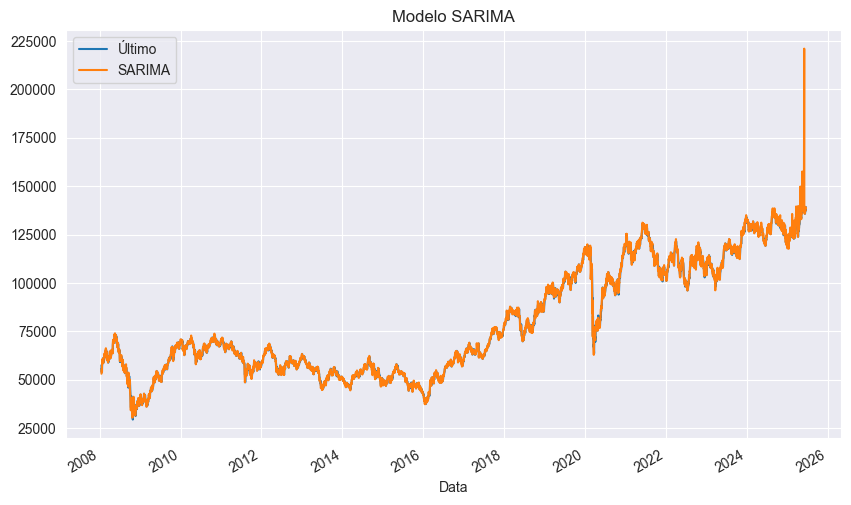

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustando o modelo SARIMA
model = SARIMAX(df_ibov_copia["Último"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
df_ibov_copia["SARIMA"] = model_fit.predict(start=1, end=len(df_ibov_copia)-1)

# Plotando os resultados
df_ibov_copia[["Último", "SARIMA"]].plot(title="Modelo SARIMA", figsize=(10, 6))
plt.show()


C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wbaldin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  

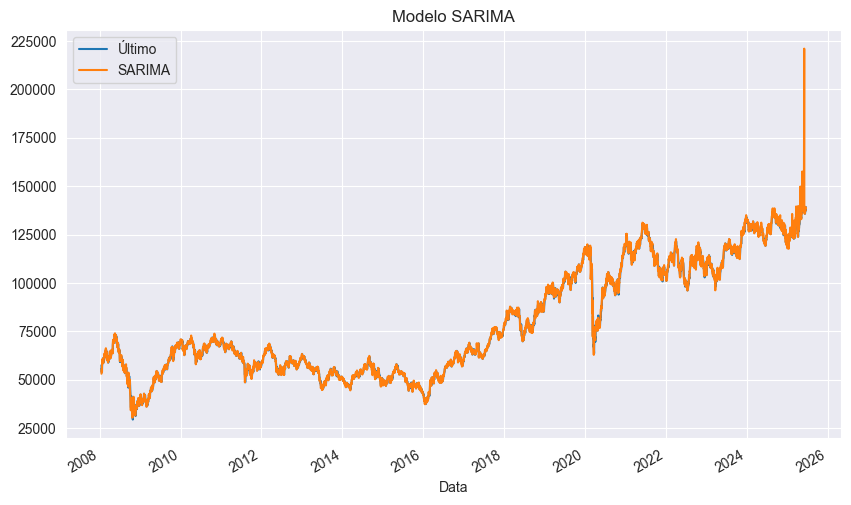

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustando o modelo SARIMA
model = SARIMAX(df_ibov_copia["Último"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
df_ibov_copia["SARIMA"] = model_fit.predict(start=1, end=len(df_ibov_copia)-1)

# Plotando os resultados
df_ibov_copia[["Último", "SARIMA"]].plot(title="Modelo SARIMA", figsize=(10, 6))
plt.show()

In [ ]:
df_ibov_copia

,Último,Abertura,Máxima,Mínima,Vol.,Var%,1 Ano
ds,,,,,,,
2025-06-18,138717,138844,139161,138443,"8,32B","-0,09%",NaN
2025-06-17,138840,139256,139497,138293,"8,38B","-0,30%",NaN
2025-06-16,139256,137212,139988,137212,"7,62B","1,49%",NaN
2025-06-13,137213,137800,137800,136586,"8,63B","-0,43%",NaN
2025-06-12,137800,137127,137931,136175,"7,12B","0,49%",NaN
...,...,...,...,...,...,...,...
2008-01-24,57463,54242,57675,54242,"3,80M","5,95%",53788.698413
2008-01-23,54235,56098,56098,53011,"3,72M","-3,32%",53844.285714
2008-01-22,56097,53705,56541,53610,"3,65M","4,45%",53913.325397


In [ ]:
df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4315 entries, 2025-06-18 to 2008-01-18
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Último    4315 non-null   int64 
 1   Abertura  4315 non-null   int64 
 2   Máxima    4315 non-null   int64 
 3   Mínima    4315 non-null   int64 
 4   Vol.      4314 non-null   object
 5   Var%      4315 non-null   object
dtypes: int64(4), object(2)
memory usage: 236.0+ KB


### Criar uma caracteristica (coluna) de fechamento positivo(1) ou negativo(0) utilizando a caracteristica [Último] como referência

In [ ]:
df_ibov_copia['Var%'] = df_ibov_copia['Var%'].str.replace('%', '').str.replace(',', '.').astype(float)

In [ ]:
print(df_ibov_copia[['Vol.', 'Var%']].dtypes)
print(df_ibov_copia[['Vol.', 'Var%']].head())

Vol.    float64
Var%    float64
dtype: object
                    Vol.  Var%
Data                          
2025-06-18  8.320000e+11 -0.09
2025-06-17  8.380000e+11 -0.30
2025-06-16  7.620000e+11  1.49
2025-06-13  8.630000e+11 -0.43
2025-06-12  7.120000e+11  0.49


In [ ]:
'''Exemplo do metodo Shift ele irá varrer o data frame e conforme o parametro colocado nele ele irá fazer o deslocamento
para linha seguinte ou anterior
Ex.: Shift(n) -> Compara valores anteriores (n>0)
     Shift(n) -> Compara valores seguintes (n<0) Vamos usar este para buscar valores seguintes
     Shift(n) -> Compara com o dia anterior (n=1)

''' 
# Exemplos de uso
df = pd.DataFrame({'Preço': [100, 102, 101, 105]})
df['Anterior'] = df['Preço'].shift(1)
df['Seguinte'] = df['Preço'].shift(-1)

df

,Preço,Anterior,Seguinte
0,100,NaN,102.0
1,102,100.0,101.0
2,101,102.0,105.0
3,105,101.0,NaN


In [ ]:
df_ibov_copia['Fechamento'] = (df_ibov['Último'].shift(-1) > df_ibov['Último']).astype('Int64')